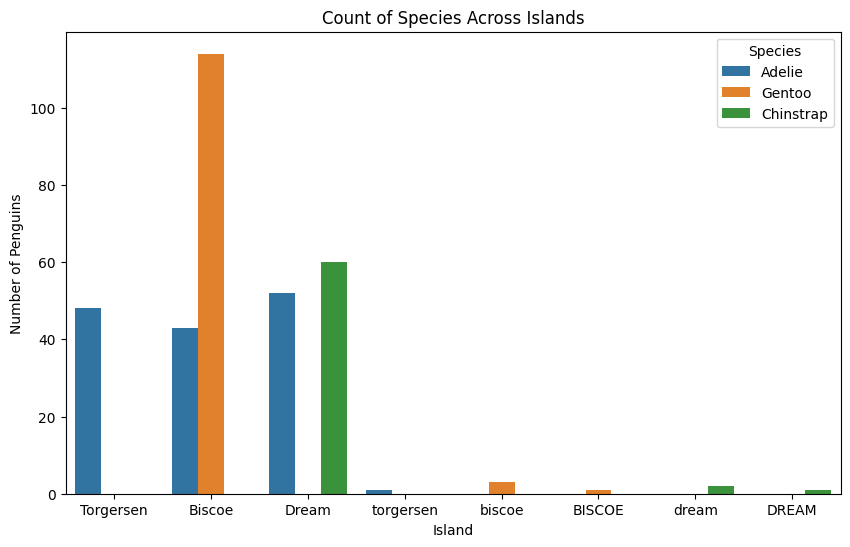

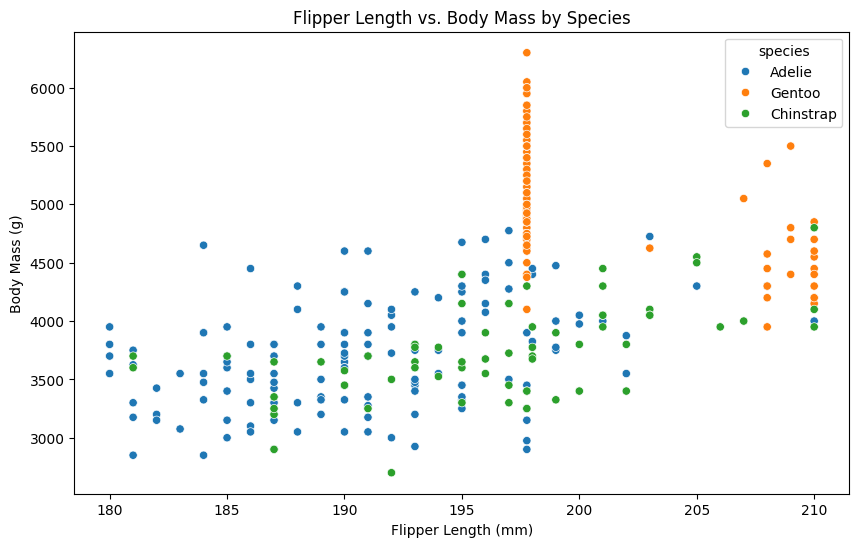

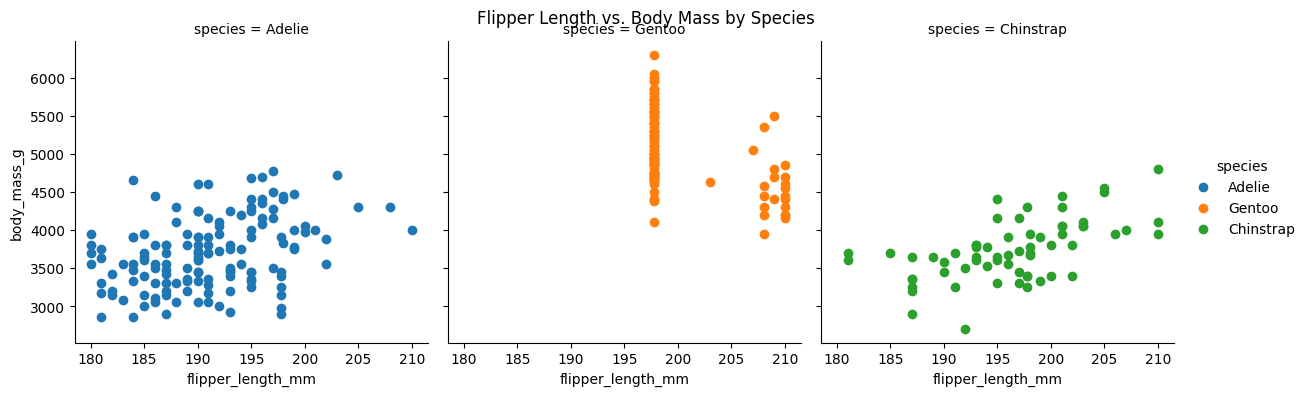

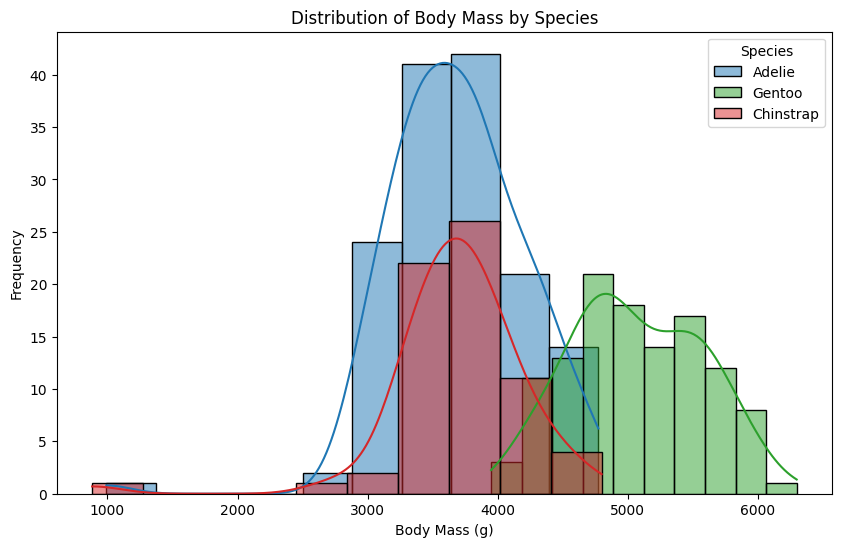

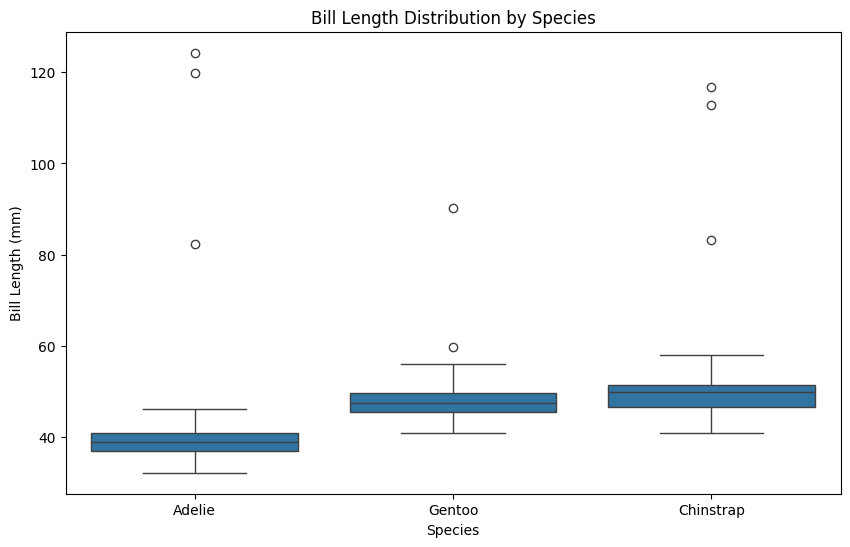

(  species     island  calorie requirement  average sleep duration  \
 0  Adelie  Torgersen                 6563                      11   
 1  Adelie  Torgersen                 4890                      14   
 2  Adelie  Torgersen                 7184                      11   
 3  Adelie  Torgersen                 4169                       8   
 4  Adelie  Torgersen                 4774                       8   
 
    bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  gender  \
 0        0.075922       0.049054           0.033333     0.529347    male   
 1        0.080260       0.037666           0.200000     0.538575  female   
 2        0.088937       0.042922           0.500000     0.437062  female   
 3             NaN            NaN                NaN     0.020303     NaN   
 4        0.049892       0.054310           0.433333     0.473976  female   
 
      year       BMI  Adelie  NaN  Gentoo  Chinstrap  
 0  2007.0  5.128766       1    0       0          0  
 1  

In [5]:
# Part 1: Data Analysis & Preprocessing [10 Points]

# 1 Importing necessary libraries
import pandas as pd

# 2 Load dataset - penguins.csv
penguins_df = pd.read_csv('/content/penguins.csv')

# Handling missing values by filling them with the mean for numeric columns
penguins_df['bill_length_mm'].fillna(penguins_df['bill_length_mm'].mean())
penguins_df['bill_depth_mm'].fillna(penguins_df['bill_depth_mm'].mean())
penguins_df['flipper_length_mm'].fillna(penguins_df['flipper_length_mm'].mean())
penguins_df['body_mass_g'].fillna(penguins_df['body_mass_g'].mean())

# 3 Handling categorical missing values by filling with mode
penguins_df['gender'].fillna(penguins_df['gender'].mode()[0])

# Data transformation: Adding a new column for BMI (Body Mass Index) estimation for penguins
penguins_df['BMI'] = penguins_df['body_mass_g'] / (penguins_df['bill_length_mm'] * penguins_df['bill_depth_mm'])

# 4  Handle mismatched string formats
penguins_df['species'] = penguins_df['species'].str.capitalize()

# 5 Handle outliers. Detect and manage outliers within the dataset
penguins_clean = penguins_df[(penguins_df['flipper_length_mm'] >= 180) & (penguins_df['flipper_length_mm'] <= 210)]
flipper_mean = penguins_df['flipper_length_mm'].mean()
penguins_df.loc[(penguins_df['flipper_length_mm'] < 180) | (penguins_df['flipper_length_mm'] > 210), 'flipper_length_mm'] = flipper_mean

# 6 y data visualization
# Count Plot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=penguins_df, x='island', hue='species')
plt.title('Count of Species Across Islands')
plt.ylabel('Number of Penguins')
plt.xlabel('Island')
plt.legend(title='Species')
plt.show()


#Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=penguins_df, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.title('Flipper Length vs. Body Mass by Species')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()

#Facet Grid
g = sns.FacetGrid(penguins_df, col='species', hue='species', height=4)
g.map(plt.scatter, 'flipper_length_mm', 'body_mass_g')
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Flipper Length vs. Body Mass by Species')
plt.show()

#Histogram
plt.figure(figsize=(10, 6))
for species in penguins_df['species'].unique():
    subset = penguins_df[penguins_df['species'] == species]
    sns.histplot(subset['body_mass_g'], kde=True, label=species, bins=10)
plt.title('Distribution of Body Mass by Species')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.legend(title='Species')
plt.show()

#BoxPlot
plt.figure(figsize=(10, 6))
sns.boxplot(data=penguins_df, x='species', y='bill_length_mm')
plt.title('Bill Length Distribution by Species')
plt.ylabel('Bill Length (mm)')
plt.xlabel('Species')
plt.show()

# 8 One-hot encoding for 'Species' column manually
species_unique = penguins_df['species'].unique()
for species in species_unique:
    penguins_df[species] = penguins_df['species'].apply(lambda x: 1 if x == species else 0)

# Normalizing 'flipper_length_mm' column manually
min_value_1 = penguins_df['flipper_length_mm'].min()
max_value_1 = penguins_df['flipper_length_mm'].max()
penguins_df['flipper_length_mm'] = (penguins_df['flipper_length_mm'] - min_value_1) / (max_value_1 - min_value_1)

# Normalizing 'bill_length_mm' column manually
min_value_2 = penguins_df['bill_length_mm'].min()
max_value_2 = penguins_df['bill_length_mm'].max()
penguins_df['bill_length_mm'] = (penguins_df['bill_length_mm'] - min_value_2) / (max_value_2 - min_value_2)

# Normalizing 'bill_depth_mm' column manually
min_value_3 = penguins_df['bill_depth_mm'].min()
max_value_3 = penguins_df['bill_depth_mm'].max()
penguins_df['bill_depth_mm'] = (penguins_df['bill_depth_mm'] - min_value_3) / (max_value_3 - min_value_3)

# Normalizing 'body_mass_g' column manually
min_value_4 = penguins_df['body_mass_g'].min()
max_value_4 = penguins_df['body_mass_g'].max()
penguins_df['body_mass_g'] = (penguins_df['body_mass_g'] - min_value_4) / (max_value_4 - min_value_4)

# Summary statistics after preprocessing
penguins_summary = penguins_df.describe()

# Show the cleaned dataset head and summary
penguins_df.head(), penguins_summary

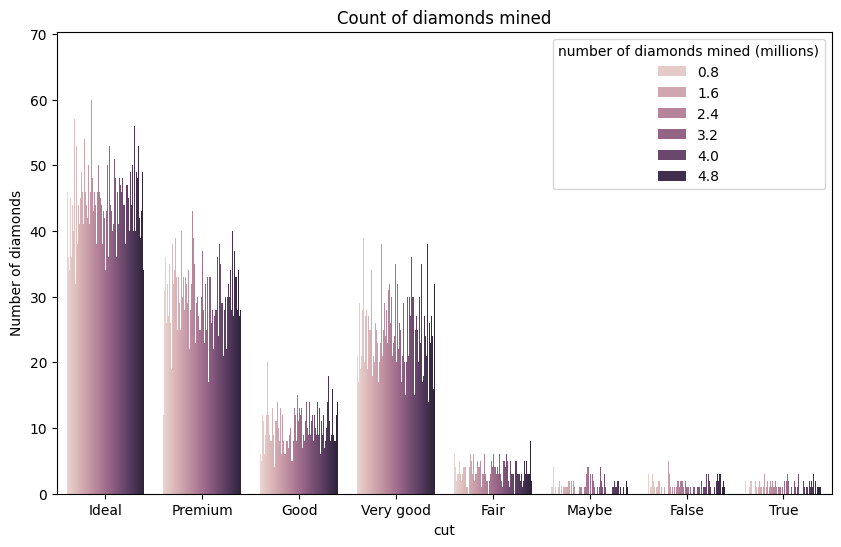

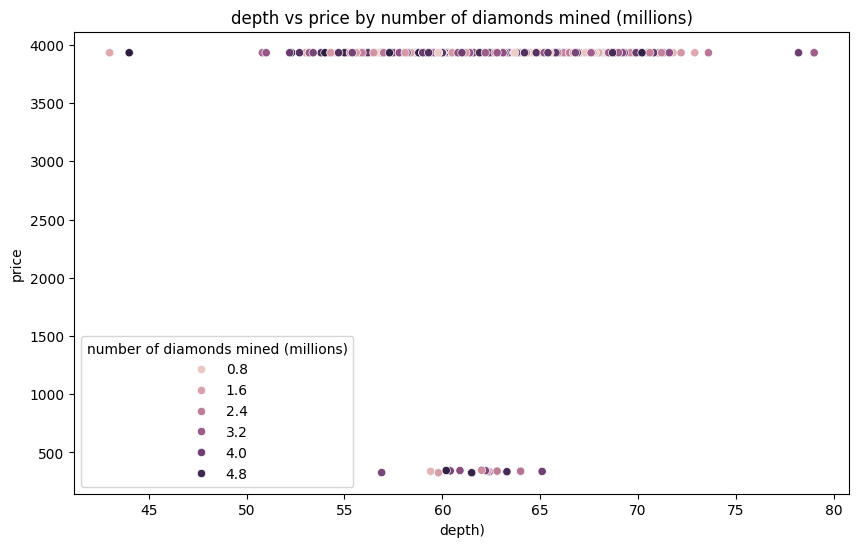

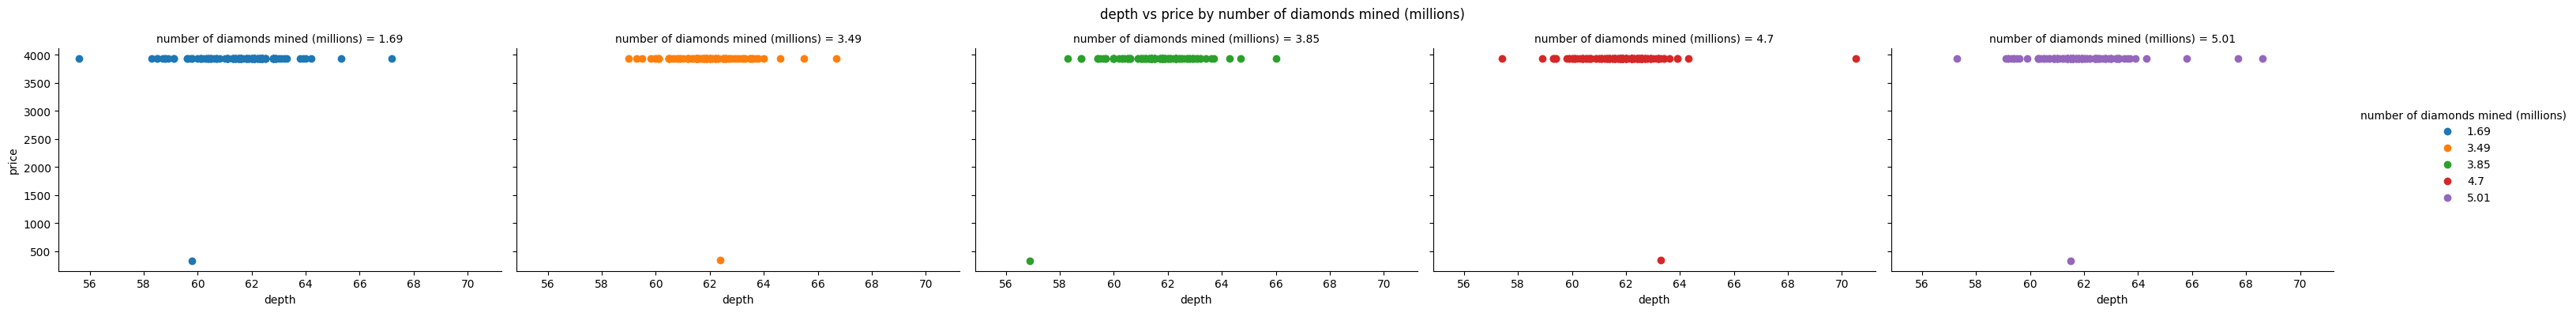

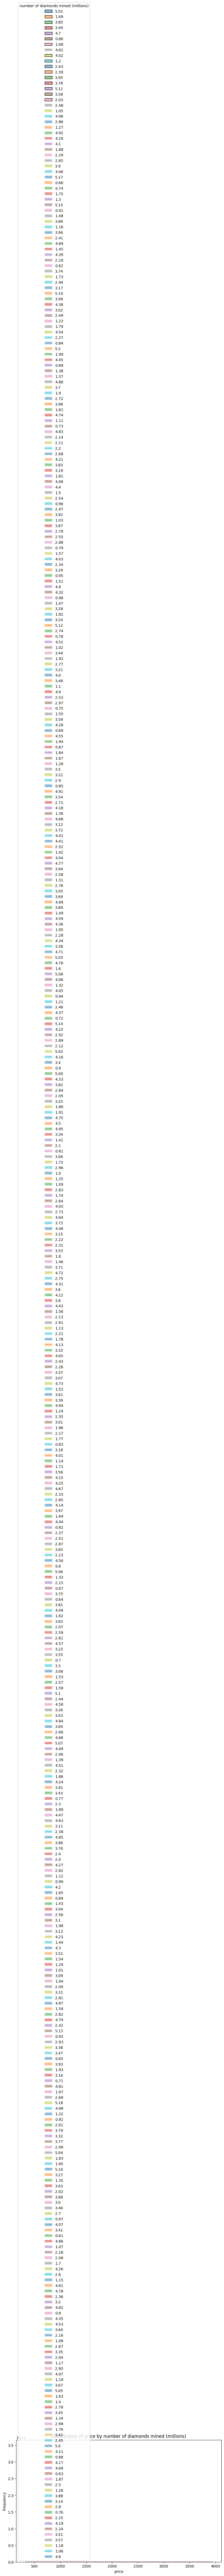

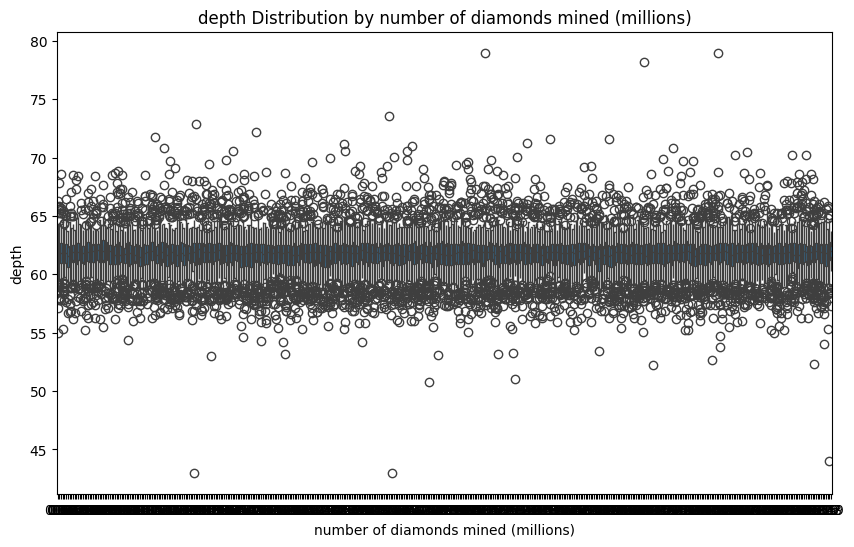

carat                                  2867
cut                                    1293
color                                  1512
clarity                                 353
average us salary                         0
number of diamonds mined (millions)       0
depth                                  2074
table                                  2910
price                                  2096
x                                      1526
y                                      1221
z                                      1433
Ideal                                     0
Premium                                   0
Good                                      0
Very good                                 0
NaN                                       0
Fair                                      0
Maybe                                     0
False                                     0
True                                      0
dtype: int64


(      carat      cut color clarity  average us salary  \
 0  0.006237    Ideal     E     SI2              31282   
 1  0.002079  Premium     E     SI1              40049   
 2  0.006237     Good     E     VS1              33517   
 3  0.018711  Premium     I     VS2              38495   
 4  0.022869     Good     J     SI2              34178   
 
    number of diamonds mined (millions)     depth     table     price     x  \
 0                                 5.01  0.513889  0.230769  0.000000  3.95   
 1                                 1.69  0.466667  0.346154  0.000000  3.89   
 2                                 3.85  0.386111  0.423077  0.000277  4.05   
 3                                 3.49  0.538889  0.288462  0.002218   4.2   
 4                                 4.70  0.563889  0.288462  0.002495  4.34   
 
    ...     z Ideal  Premium  Good  Very good  NaN  Fair  Maybe  False  True  
 0  ...  2.43     1        0     0          0    0     0      0      0     0  
 1  ...  2.31   

In [23]:
# Part 2: Data Cleaning & Analysis on Other Datasets [10 Points]

# Load dataset - diamond.csv
diamond_df = pd.read_csv('/content/diamond.csv')

# Dropping unnecessary column 'Unnamed: 0'
diamond_df = diamond_df.drop(columns=['Unnamed: 0'])

# Ensure 'carat', 'depth', and 'table' columns are of type float
diamond_df['carat'] = pd.to_numeric(diamond_df['carat'], errors='coerce')
diamond_df['depth'] = pd.to_numeric(diamond_df['depth'], errors='coerce')
diamond_df['table'] = pd.to_numeric(diamond_df['table'], errors='coerce')

# Handling missing values in numeric columns by using mean
diamond_df['carat'].fillna(diamond_df['carat'].mean())
diamond_df['depth'].fillna(diamond_df['depth'].mean())
diamond_df['table'].fillna(diamond_df['table'].mean())


# Handling categorical missing values by using mode
diamond_df['cut'].fillna(diamond_df['cut'].mode()[0])
diamond_df['color'].fillna(diamond_df['color'].mode()[0])

# 4  Handle mismatched string formats
diamond_df['cut'] = diamond_df['cut'].str.capitalize()

# 5 Handle outliers. Detect and manage outliers within the dataset
diamond_df['price'] = pd.to_numeric(diamond_df['price'],errors='coerce')
diamond_clean = diamond_df[(diamond_df['price'] >= 300) & (diamond_df['price'] <= 350)]
flippermean = diamond_df['price'].mean()
diamond_df.loc[(diamond_df['price'] < 300) | (diamond_df['price'] > 350), 'price'] = flippermean

# 6 y data visualization
# Count Plot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=diamond_df, x='cut', hue='number of diamonds mined (millions)')
plt.title('Count of diamonds mined')
plt.ylabel('Number of diamonds')
plt.xlabel('cut')
plt.legend(title='number of diamonds mined (millions)')
plt.show()


#Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=diamond_df, x='depth', y='price', hue='number of diamonds mined (millions)')
plt.title('depth vs price by number of diamonds mined (millions)')
plt.xlabel('depth)')
plt.ylabel('price')
plt.show()

#Facet Grid
limited_df = diamond_df[diamond_df['number of diamonds mined (millions)'].isin(diamond_df['number of diamonds mined (millions)'].unique()[:5])]
g = sns.FacetGrid(limited_df, col='number of diamonds mined (millions)', hue='number of diamonds mined (millions)', height=4, aspect=1.5)
g.map(plt.scatter, 'depth', 'price')
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle('depth vs price by number of diamonds mined (millions)')
plt.show()

#Histogram
plt.figure(figsize=(10, 6))
for species in diamond_df['number of diamonds mined (millions)'].unique():
    subset = diamond_df[diamond_df['number of diamonds mined (millions)'] ==species]
    sns.histplot(subset['price'], kde=True, label=species, bins=10)
plt.title('Distribution of price by number of diamonds mined (millions)')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.legend(title='number of diamonds mined (millions)')
plt.show()

#BoxPlot
plt.figure(figsize=(10, 6))
sns.boxplot(data=diamond_df, x='number of diamonds mined (millions)', y='depth')
plt.title('depth Distribution by number of diamonds mined (millions)')
plt.ylabel('depth')
plt.xlabel('number of diamonds mined (millions)')
plt.show()

# 8 One-hot encoding for 'Species' column manually
cut_unique = diamond_df['cut'].unique()
for cut in cut_unique:
    diamond_df[cut] = diamond_df['cut'].apply(lambda x: 1 if x == cut else 0)

# Normalizing 'flipper_length_mm' column manually
min_value_1 = diamond_df['depth'].min()
max_value_1 = diamond_df['depth'].max()
diamond_df['depth'] = (diamond_df['depth'] - min_value_1) / (max_value_1 - min_value_1)

# Normalizing 'bill_length_mm' column manually
min_value_2 = diamond_df['price'].min()
max_value_2 = diamond_df['price'].max()
diamond_df['price'] = (diamond_df['price'] - min_value_2) / (max_value_2 - min_value_2)

# Normalizing 'bill_depth_mm' column manually
min_value_3 = diamond_df['carat'].min()
max_value_3 = diamond_df['carat'].max()
diamond_df['carat'] = (diamond_df['carat'] - min_value_3) / (max_value_3 - min_value_3)

# Normalizing 'body_mass_g' column manually
min_value_4 = diamond_df['table'].min()
max_value_4 = diamond_df['table'].max()
diamond_df['table'] = (diamond_df['table'] - min_value_4) / (max_value_4 - min_value_4)

print(diamond_df.isnull().sum())



# Summary statistics after cleaning
diamond_summary = diamond_df.describe()

# Load dataset - breeding_bird_atlas.csv
bird_df = pd.read_csv('/content/breeding_bird_atlas.csv')

# Dropping unnecessary columns
bird_df = bird_df.drop(columns=['Map Link', 'Family Name', 'Family Description', 'Average UB Student GPA'])

# Handling missing values in 'Temperature' by filling with mean
bird_df['Temperature'].fillna(bird_df['Temperature'].mean(), inplace=True)

# Data transformation: Adding a new column to indicate if bird sighting occurred in a Federal Protected Area
bird_df['Protected Area Sighting'] = bird_df['NYS Protection Status'].apply(lambda x: 'Yes' if x == 'Protected' else 'No')

# Summary statistics for bird dataset
bird_summary = bird_df.describe()

# Showing cleaned data head for diamond and bird datasets, along with their summaries
diamond_df.head(), diamond_summary, bird_df.head(), bird_summary
